In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,roc_curve
from sklearn.metrics import  ConfusionMatrixDisplay

In [8]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/Drive/MyDrive/Colab Notebooks/data/cancer.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
#df.head()
df.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
202,878796,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762
297,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
130,866714,B,12.190,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,...,13.34,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241
527,91813702,B,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592
280,8912049,M,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,...,23.72,35.90,159.80,1724.0,0.17820,0.38410,0.57540,0.18720,0.3258,0.09720
427,90745,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,...,12.76,32.04,83.69,489.5,0.13030,0.16960,0.19270,0.07485,0.2965,0.07662
183,873843,B,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.02361,...,12.37,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427
194,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701
88,861597,B,12.360,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,...,13.83,30.50,91.46,574.7,0.13040,0.24630,0.24340,0.12050,0.2972,0.09261


In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

<ipython-input-13-9eedf09b8c87>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


In [14]:
df.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
283,8912280,1,16.240,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,...,18.550,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630
554,924632,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,13.890,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
17,84862001,1,16.130,20.68,108.10,798.8,0.11700,0.20220,0.172200,0.10280,...,20.960,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420
446,9110732,1,17.750,28.03,117.30,981.6,0.09997,0.13140,0.169800,0.08293,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
534,919537,0,10.960,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,...,11.620,26.51,76.43,407.5,0.14280,0.25100,0.21230,0.09861,0.2289,0.08278
337,897630,1,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.06090,...,24.540,34.37,161.10,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870
395,903811,0,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,...,14.920,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
167,8712729,1,16.780,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.06576,...,20.050,26.30,130.70,1260.0,0.11680,0.21190,0.23180,0.14740,0.2810,0.07228
224,8813129,0,13.270,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.02456,...,15.140,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623
402,904689,0,12.960,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.01883,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247


In [15]:
X = df.iloc[2:,2:]
Y = df['diagnosis']

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
Y_pred = dtc.predict(X_test)


In [20]:
print(Y_pred)

[0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0]


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9370629370629371


In [23]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        89
           1       0.89      0.94      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [26]:
corr = df.corr()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[83  6]
 [ 3 51]]


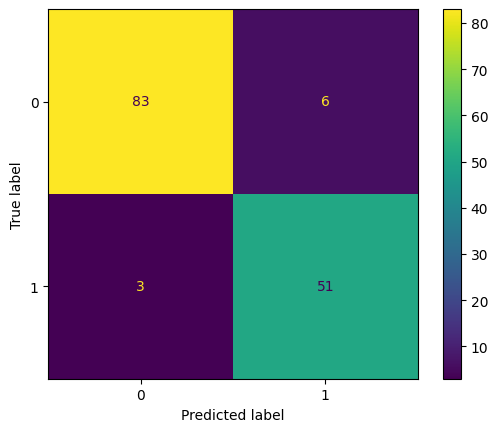

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc.classes_)
disp.plot()
plt.show()